# Importing the libraries

In [1]:
#Essentials
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

#Categorical Encoders
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder


#categorical attribute testing
from sklearn.feature_selection import chi2

#feature Scaling
from sklearn.preprocessing import StandardScaler

#Models and Accuracy checks

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  mean_squared_error, roc_curve, auc 


### Data Loading and Exploration
Reading the dataset files from local computer and assigning to a var.

In [2]:
train_df = pd.read_csv("C:/Users/adilh/Projects/2nd_project/train.csv")
test_df = pd.read_csv("C:/Users/adilh/Projects/2nd_project/test.csv")

In [3]:
#checking out training dataset values.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### understanding the attributes as follow:
     PassengerId: Id for a person.
     Survived: 0 means person has not survived, 1 means person survived. This is target column.
     Pclass: Person or passenger class (1st=Upper / 1, 2nd= Middle / 2, 3rd=Lower / 3)
     Name: Person Full Name
     Sex: Person gender (male or female)
     Age: Person Age (float value)
     SibSp: number of siblings and spouses aboard
     Parch: Number of parent and children aboard
     Ticket: Ticket number
     Fare: Passenger fare
     Cabin: Cabin number
     Embarked:(C=Cherbourg, Q=Queenstown, S=Southampton) Inform where the passenger embarked from.

In [4]:
#there are 891 number of rows and 12 column in the training_dataset csv file.
train_df.shape

(891, 12)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### this table describes that:
    1. About 38% of the passenger survived the Titanic.
    2. Passenger aboard the Titanic was nearly 30 years of age.
    3. About 32$ or any currency value was the mean fare. 

Now looking at the categorical attributes of every column


In [7]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
train_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [10]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [11]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [12]:
train_df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [13]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
#just checking out how many of null values are there in a dataset.
null_values=train_df.isnull().sum()

print(null_values)

#this answers that there are some null values in column age and cabin.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Plotting relationship between Variables

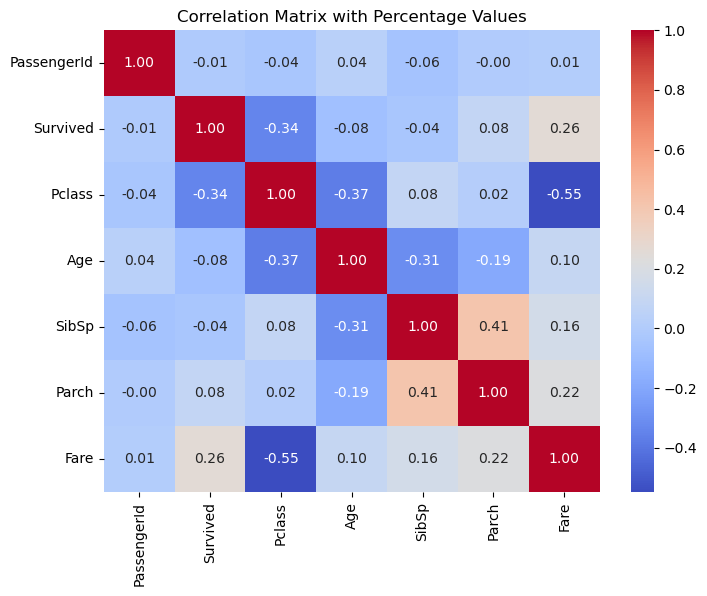

In [15]:
# Create a heatmap with percentage annotations

correlation=train_df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix with Percentage Values')
plt.show()

# This correlation matrix can assist us in understanding the relations between features and outcome.
# We can consider positive percentage relations alongside dynamic other relations. 

In [16]:
#printing percentage value of correlation matrix
#this percentage can help us understand the correlation between the variables or features such as 
correlation_percentage=correlation * 100
print(correlation_percentage)

             PassengerId    Survived      Pclass         Age       SibSp  \
PassengerId   100.000000   -0.500666   -3.514399    3.684720   -5.752683   
Survived       -0.500666  100.000000  -33.848104   -7.722109   -3.532250   
Pclass         -3.514399  -33.848104  100.000000  -36.922602    8.308136   
Age             3.684720   -7.722109  -36.922602  100.000000  -30.824676   
SibSp          -5.752683   -3.532250    8.308136  -30.824676  100.000000   
Parch          -0.165201    8.162941    1.844267  -18.911926   41.483770   
Fare            1.265822   25.730652  -54.949962    9.606669   15.965104   

                  Parch        Fare  
PassengerId   -0.165201    1.265822  
Survived       8.162941   25.730652  
Pclass         1.844267  -54.949962  
Age          -18.911926    9.606669  
SibSp         41.483770   15.965104  
Parch        100.000000   21.622494  
Fare          21.622494  100.000000  


In the context of the train_df dataset, the correlation matrix can provide insights into how various factors or features are related to each other. Here are some key points about interpreting the correlation matrix:

###### Passenger Attributes:

The correlation matrix may show relationships between variables such as age, fare, class, and survival status.

###### Interpretation:

Survival Correlations: It may reveal which factors have a higher correlation with survival likelihood. For example, variables like passenger class (Pclass) or age may show correlations with survival outcomes.

Class Correlations: The correlation matrix may indicate how passenger class (Pclass) is correlated with other variables. This can help understand the socio-economic dynamics among passengers.

Age and Fare Correlations: Correlations between age and fare could indicate how ticket prices were related to passenger age or class.

Insights:
The correlation matrix can help identify which variables might be more important or influential in predicting survival or other outcomes.
It can guide feature selection for predictive modeling or statistical analysis.

Limitations:
Correlation does not imply causation, so while correlations can highlight relationships, they do not explain the reasons behind them.
The correlation matrix focuses on linear relationships and may not capture non-linear associations between variables.

In summary, the correlation matrix of the train_df can help in understanding how different features are related within the dataset, particularly in terms of survival outcomes and passenger characteristics.

##### Survival Correlation

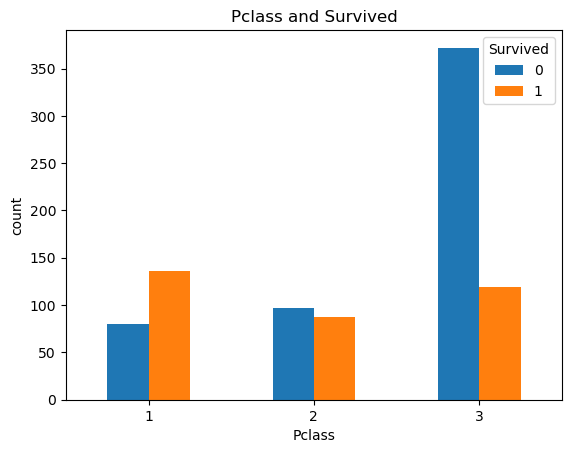

In [17]:
#plot the crosstab graph for elaboration
table=pd.crosstab(train_df['Pclass'],train_df['Survived'])

axis=table.plot(kind='bar')
plt.title('Pclass and Survived')
plt.xlabel('Pclass')
plt.ylabel('count')
plt.xticks(rotation=0)

plt.show()



Analyzing the crosstab between Pclass and Survived in the dataset reveals significant disparities in survival rates based  on passenger class. 
Higher-class passengers exhibited higher survival rates, indicating socio-economic status played a crucial role in survival outcomes. 
This analysis provides valuable insights into the dynamics of the tragedy.

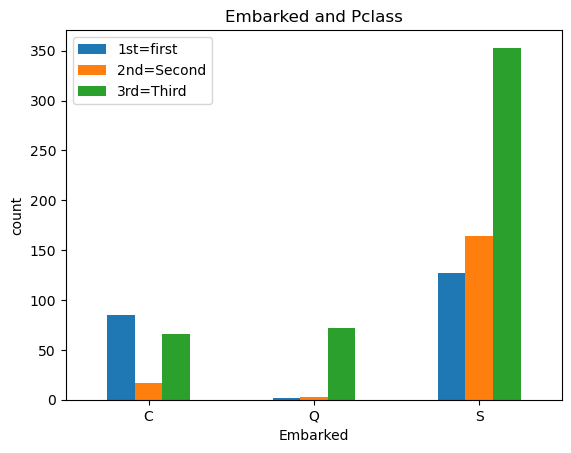

In [18]:
#plot the crosstab graph for elaboration

table=pd.crosstab(train_df['Embarked'],train_df['Pclass'])

axis=table.plot(kind='bar')
plt.title('Embarked and Pclass')
plt.xlabel('Embarked')
plt.ylabel('count')
custom_handles=['1st=first','2nd=Second','3rd=Third']
plt.legend(custom_handles)
plt.xticks(rotation=0)
plt.show()

Analyzing the crosstab between Embarked and Pclass in the dataset uncovers potential correlations between boarding location and passenger class. This analysis may reveal patterns in class distribution across different embarkation ports, shedding light on socio-economic factors influencing passengers' travel choices.

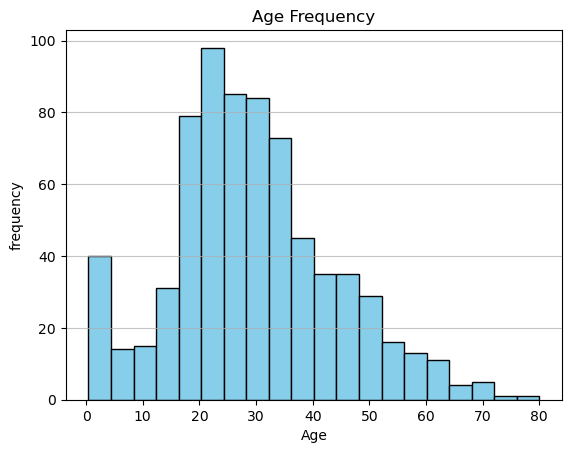

In [19]:
#plot the Age graph for elaboration
plt.hist(train_df['Age'].dropna(),bins=20,color='skyblue',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.75)
plt.title('Age Frequency')
plt.show()

both graphs of the age column is useful for displaying the distribution of ages, identifying patterns, outliers, and central tendencies. This is important for comprehending the demographic features of the dataset and extracting valuable insights from the data.

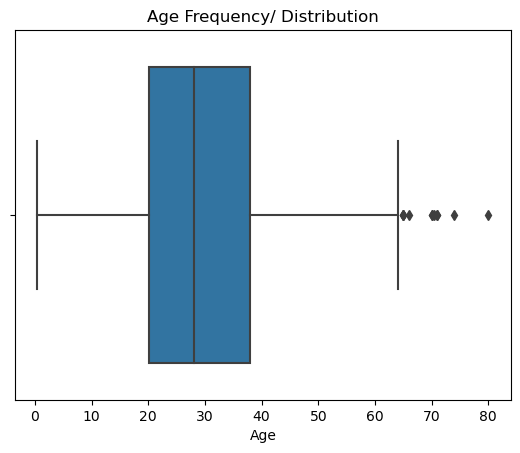

In [20]:
#plotting boxplot to read age distribution

sns.boxplot(x=train_df['Age'])
plt.title('Age Frequency/ Distribution')
plt.show()


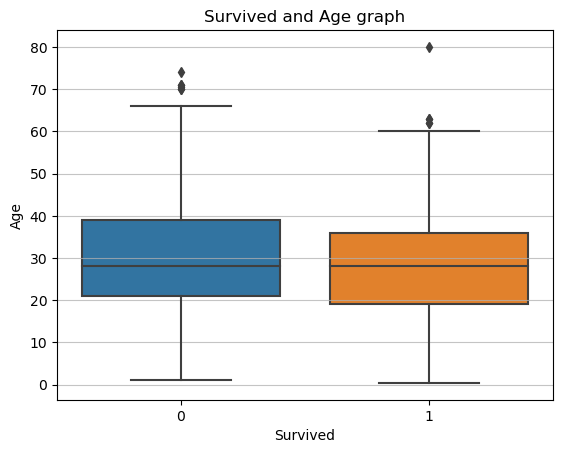

In [21]:
#plot the boxplot graph for elaboration
sns.boxplot(x=train_df['Survived'],y=train_df['Age'])

plt.title('Survived and Age graph')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.75)
plt.show()



A boxplot of 'Survived' and 'Age' provides insights into the relationship between age and survival status. It can reveal differences in age distributions between survivors and non-survivors. Key information includes median age of survivors, age range for each group, and potential outliers. This visualization helps understand how age may have influenced survival outcomes in the dataset.

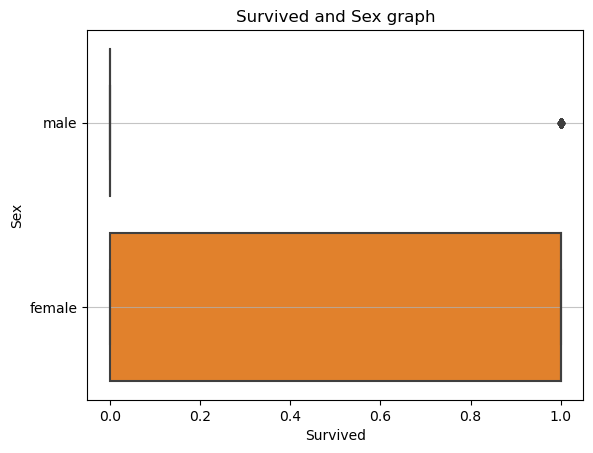

In [22]:
#plot the boxplot graph for elaboration
sns.boxplot(x=train_df['Survived'],y=train_df['Sex'])

plt.title('Survived and Sex graph')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.grid(axis='y', alpha=0.75)
plt.show()


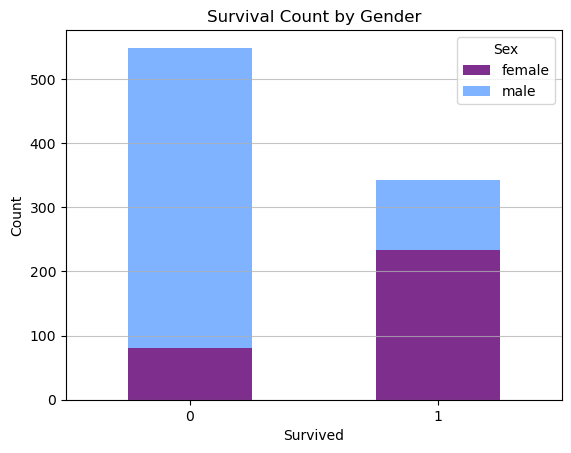

In [23]:
# Calculate counts for each combination of survival and sex

survived_sex = train_df.groupby(['Survived', 'Sex']).size().unstack()

# Create stacked bar chart
survived_sex.plot(kind='bar', stacked=True, color=[	"#7E2F8E", "#80B3FF"])

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.legend(title='Sex')

# Display the chart
plt.show()

To understand the relationship between the 'Survived' and 'Sex' columns in a dataset, creating a stacked bar chart can be handy. This plot can effectively display the distribution of survival outcomes based on gender.This visualization allows for easy comparison of survival rates between males and females.

### Data Preprocessing

In [24]:
# Check for missing values
print(train_df.isnull().sum())

# Handle missing values (example: fill missing values with the mean)
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:
# Check for missing values
print(test_df.isnull().sum())

# Handle missing values (example: fill missing values with the mean)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


##### label encoder 
A label encoder converts categorical data into numerical form by assigning a unique integer to each category. It's used in machine learning to handle non-numeric data but can cause issues if the encoded integers are misinterpreted as having an ordinal relationship.


In [26]:
# Handle categorical data for column ['Embarked'] (example: Label encoding)
le = LabelEncoder()
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])

##### ordinal encoder

An ordinal encoder is used for categorical data with an inherent order. It assigns integers based on the order of categories, preserving the rank relationship. This encoding is ideal for ordinal data like ratings (e.g., "low," "medium," "high").

In [27]:
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OrdinalEncoder

# Create a SimpleImputer to handle missing values by replacing them with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the 'Sex' and 'Cabin' columns
train_df[['Sex', 'Cabin']] = imputer.fit_transform(train_df[['Sex', 'Cabin']])
test_df[['Sex', 'Cabin']] = imputer.fit_transform(test_df[['Sex', 'Cabin']])

# Create an OrdinalEncoder to encode the categories in the 'Sex' and 'Cabin' columns
encoder = OrdinalEncoder()

# Fit and transform the encoder on the 'Sex' and 'Cabin' columns
train_df[['Sex', 'Cabin']] = encoder.fit_transform(train_df[['Sex', 'Cabin']])
test_df[['Sex', 'Cabin']] = encoder.fit_transform(test_df[['Sex', 'Cabin']])

    Applying Chi-square test on the categorical attributes such as Sex and Embarked.
    Higher Chi-square scores indicate stronger relationships with the target variable.

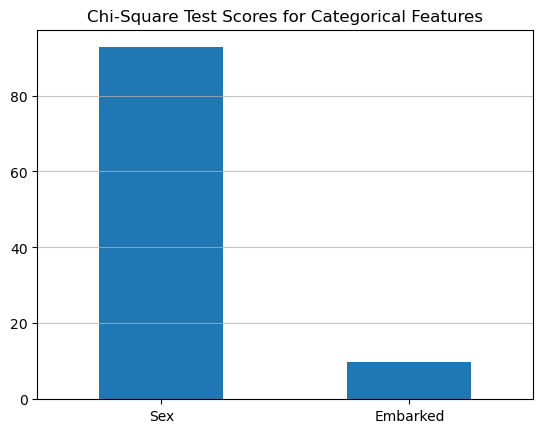

In [28]:
#Applying Chi-square test on the categorical attributes such as Sex and Embarked
data_input=train_df[['Sex','Embarked']]
data_output=train_df['Survived']

chi_score=chi2(data_input, data_output)
chi2_score=pd.Series(chi_score[0],index=data_input.columns)
chi2_score.sort_values(ascending=False).plot.bar()
plt.title('Chi-Square Test Scores for Categorical Features')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=0)
plt.show()

#### Feature Engineering / feature Scaling

Created a new column named family_size, which are the addition of SibSp and Parch.

recall: Sibsp represents sibling and spouses, and Parch represented parent and children subsequently. 


In [29]:
# Feature engineering (example: creating a new feature 'family_size')
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch']
test_df['Family_size'] = test_df['SibSp'] + test_df['Parch']

# Normalize the numerical data (example: Min-Max scaling)
#train_df['Age'] = (train_df['Age'] - train_df['Age'].min()) / (train_df['Age'].max() - train_df['Age'].min())

In [30]:
#rechecking any null value if present in the dataframe.
print(train_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Family_size    0
dtype: int64


In [31]:
#rechecking any null value if present in the dataframe.
print(test_df.isnull().sum())


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Family_size    0
dtype: int64


In [32]:
#Whenever we need to select multiple columns, they should be sent as a list.
#we are considering Cabin as a feature,
#supposing Cabin on higher deck has more chances of survival then other two Cabins.

final_features=['PassengerId','Pclass','Sex','Age','Fare','Cabin','Embarked','Family_size']
X = train_df[final_features]
y = train_df['Survived']

final_features_test=['PassengerId','Pclass','Sex','Age','Fare','Cabin','Embarked','Family_size']
X_testdf = test_df[final_features_test]




StandardScaler():
 scales the features so that each feature has a mean of 0 and a standard deviation of 1. The scaled data is converted back into a df with the same column names.

In [33]:
#initialize the Standard Scaler
scaler=StandardScaler()

#fit and transforming the data
X_scaled=scaler.fit_transform(X)

#Converting the scaled data into dataframe again
X_scaled_df=pd.DataFrame(X_scaled, columns=X.columns)

X=X_scaled_df  

print(X.head())

   PassengerId    Pclass       Sex       Age      Fare     Cabin  Embarked  \
0    -1.730108  0.827377  0.737695 -0.592481 -0.502445 -0.281881  0.581114   
1    -1.726220 -1.566107 -1.355574  0.638789  0.786845  1.161545 -1.938460   
2    -1.722332  0.827377 -1.355574 -0.284663 -0.488854 -0.281881  0.581114   
3    -1.718444 -1.566107 -1.355574  0.407926  0.420730  0.057748  0.581114   
4    -1.714556  0.827377  0.737695  0.407926 -0.486337 -0.281881  0.581114   

   Family_size  
0     0.059160  
1     0.059160  
2    -0.560975  
3     0.059160  
4    -0.560975  


In [34]:
#initialize the Standard Scaler
#scaler=StandardScaler()

#fit and transforming the data
X_test_scaled=scaler.fit_transform(X_testdf)

#Converting the scaled data into dataframe again
X_test_scaled_df=pd.DataFrame(X_test_scaled, columns=X_testdf.columns)

X_testing=X_test_scaled_df  

print(X_testing.head())

   PassengerId    Pclass       Sex       Age      Fare    Cabin  Embarked  \
0    -1.727912  0.873482  0.755929  0.334993 -0.498407 -0.35149 -0.470915   
1    -1.719625  0.873482 -1.322876  1.325530 -0.513274 -0.35149  0.700767   
2    -1.711337 -0.315819  0.755929  2.514175 -0.465088 -0.35149 -0.470915   
3    -1.703050  0.873482  0.755929 -0.259330 -0.483466 -0.35149  0.700767   
4    -1.694763  0.873482 -1.322876 -0.655545 -0.418471 -0.35149  0.700767   

   Family_size  
0    -0.553443  
1     0.105643  
2    -0.553443  
3    -0.553443  
4     0.764728  


splitting the data using train test split 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Performing gridsearch on model helps us understand which model after the tuning hyperparameters help in achieving best accuracy.

#### Creating a  Logistic Regression Classifier

In [36]:
#instantiate the model
clf = LogisticRegression(random_state=42)

#fit the model
clf.fit(X_train,y_train)

#make prediction
y_pred=clf.predict(X_test)

#evaluate the model
clf_accuracy = accuracy_score(y_test, y_pred)
clf_conf_matrix = confusion_matrix(y_test, y_pred)
clf_class_report = classification_report(y_test, y_pred)

#displaying 
print(f"Accuracy: {clf_accuracy:.2f}")

print("Confusion Matrix:")
print(clf_conf_matrix)

print("Classification Report:")
print(clf_class_report)

Accuracy: 0.81
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#### Grid_search_
Purpose: This retrieves the combination of hyperparams that would yield the best performance during cross-validation.
Explanation: During gridsearch multiple combination of hyperparams eg; learning rate, number of estimators etc are tried and the performance is evaluated using cross-validation.

during the gridsearch, the performance of the model is evaluated using a scoring metric for each hyperparameter combination.
The best_score determines, how much an accuracy can be obtained on best_params_.

gridsearch has been conducted for every model to understand in best conditions which model would give high scores.

In [37]:
# Define parameter grid
param_grid_lr = [
    # For 'liblinear' solver
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    # For 'saga' solver
    {
        'solver': ['saga'],
        'penalty': ['l2', 'elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.5, 0.9]  # Only relevant for 'elasticnet' penalty
    }
]

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best Score for Logistic Regression: {grid_search_lr.best_score_}")
lr_best_score = grid_search_lr.best_score_


# Use best model to make predictions
best_lr_model = grid_search_lr.best_estimator_
clf_y_pred = best_lr_model.predict(X_test)

#evaluate the model
clf_accuracy = accuracy_score(y_test, clf_y_pred)
clf_conf_matrix = confusion_matrix(y_test, clf_y_pred)
clf_class_report = classification_report(y_test, clf_y_pred)

#displaying 
print(f"Accuracy: {clf_accuracy:.2f}")

print("Confusion Matrix:")
print(clf_conf_matrix)

print("Classification Report:")
print(clf_class_report)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters for Logistic Regression: {'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Score for Logistic Regression: 0.8033389146065202
Accuracy: 0.82
Confusion Matrix:
[[95 10]
 [23 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



C:\Users\adilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


#### Creating a  Random Forest Classifier

In [38]:
#instantiate the model
Rf_clf = RandomForestClassifier(random_state=42)

#fit the model
Rf_clf.fit(X_train,y_train)

#make prediction
Rf_y_pred=Rf_clf.predict(X_test)

#evaluate the model
Rf_accuracy = accuracy_score(y_test, Rf_y_pred)
Rf_conf_matrix = confusion_matrix(y_test, Rf_y_pred)
Rf_class_report = classification_report(y_test, Rf_y_pred)

#displaying 
print(f"Accuracy: {Rf_accuracy:.2f}")

print("Confusion Matrix:")
print(Rf_conf_matrix)

print("Classification Report:")
print(Rf_class_report)

Accuracy: 0.84
Confusion Matrix:
[[95 10]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       105
           1       0.85      0.74      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [39]:
# Define parameter grid
param_grid_Rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV
grid_search_Rf = GridSearchCV(RandomForestClassifier(), param_grid_Rf, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_Rf.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters for Random Forest: {grid_search_Rf.best_params_}")
print(f"Best Score for Random Forest: {grid_search_Rf.best_score_}")
Rf_best_score = grid_search_Rf.best_score_

# Use best model to make predictions
best_Rf_model = grid_search_Rf.best_estimator_
y_pred_Rf = best_Rf_model.predict(X_test)

# Evaluate the model

Rf_accuracy = accuracy_score(y_test, y_pred_Rf)
Rf_conf_matrix = confusion_matrix(y_test, y_pred_Rf)
Rf_class_report = classification_report(y_test, y_pred_Rf)

#displaying 
print(f"Accuracy: {Rf_accuracy:.2f}")

print("Confusion Matrix:")
print(Rf_conf_matrix)

print("Classification Report:")
print(Rf_class_report)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for Random Forest: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Random Forest: 0.8426770412685904
Accuracy: 0.84
Confusion Matrix:
[[94 11]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



#### Creating a  Support Vector Machine

In [40]:
# Initialize the SVM model with a kernel 
Svm_model = SVC(kernel='rbf', random_state=42)  # 'rbf' is the default kernel.

# Fit the model on the training data
Svm_model.fit(X_train, y_train)

# Make predictions on the test data
Svm_y_pred = Svm_model.predict(X_test)

#evaluate the model
Svm_accuracy = accuracy_score(y_test, Svm_y_pred)
Svm_conf_matrix = confusion_matrix(y_test, Svm_y_pred)
Svm_class_report = classification_report(y_test, Svm_y_pred)

#displaying 
print(f"Accuracy: {Svm_accuracy:.2f}")

print("Confusion Matrix:")
print(Svm_conf_matrix)

print("Classification Report:")
print(Svm_class_report)

Accuracy: 0.82
Confusion Matrix:
[[92 13]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [41]:
# Hyperparameter tuning is essential for optimizing model performance,  
# improving accuracy, enhancing generalization, and adapting models to different datasets. 
# It systematically searches for the best hyperparameter values, ensuring the model performs at its best.

# Define parameter grid

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
svc_best_score = grid_search.best_score_

# Use best model to make predictions
best_model = grid_search.best_estimator_
Svm_y_pred = best_model.predict(X_test)


#evaluate the model
Svm_accuracy = accuracy_score(y_test, Svm_y_pred)
Svm_conf_matrix = confusion_matrix(y_test, Svm_y_pred)
Svm_class_report = classification_report(y_test, Svm_y_pred)

#displaying 
print(f"Accuracy: {Svm_accuracy:.2f}")

print("Confusion Matrix:")
print(Svm_conf_matrix)

print("Classification Report:")
print(Svm_class_report)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.8117305229981288
Accuracy: 0.82
Confusion Matrix:
[[92 13]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



#### Creating a Gradient Boosting Machine

In [42]:
# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier()

# Define the parameter grid
param_grid_gbm = {
    'n_estimators': [50, 100, 200], #Number of boosting stages to be run.
    'learning_rate': [0.01, 0.1, 0.2], #Step size shrinking to prevent overfitting.
    'max_depth': [3, 5, 7],    #Maximum depth of the individual trees.
    'min_samples_split': [2, 5, 10], #Minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4] #Minimum number of samples required to be at a leaf node.
}

# Initialize GridSearchCV
grid_search_gbm = GridSearchCV(gbm, param_grid_gbm, cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_gbm.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters for GBM: {grid_search_gbm.best_params_}")
print(f"Best Score for GBM: {grid_search_gbm.best_score_}")
gbm_best_score = grid_search_gbm.best_score_

# Get the best model
best_gbm_model = grid_search_gbm.best_estimator_

# Make predictions on the test set
y_pred_gbm = best_gbm_model.predict(X_test)


#evaluate the model
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
gbm_conf_matrix = confusion_matrix(y_test, y_pred_gbm)
gbm_class_report = classification_report(y_test, y_pred_gbm)

#displaying 
print(f"Accuracy: {gbm_accuracy:.2f}")

print("Confusion Matrix:")
print(gbm_conf_matrix)

print("Classification Report:")
print(gbm_class_report)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters for GBM: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for GBM: 0.8314836483116453
Accuracy: 0.82
Confusion Matrix:
[[91 14]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



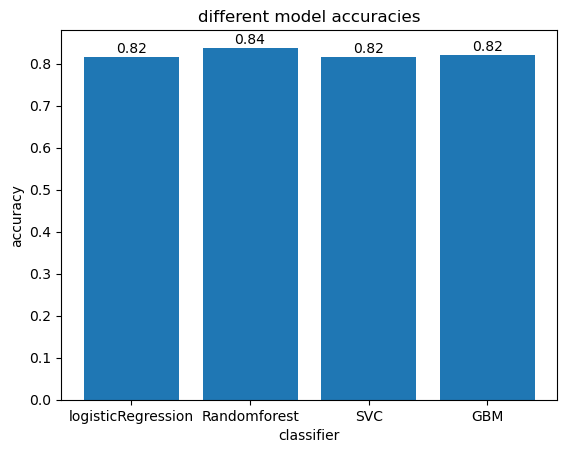

In [43]:
# Now comparing the classifiers accuracy
classifier_used=['logisticRegression','Randomforest','SVC','GBM']

accuracies=[clf_accuracy, Rf_accuracy, Svm_accuracy, gbm_accuracy]
plt.bar(classifier_used,accuracies)
plt.xlabel('classifier')
plt.ylabel('accuracy')
plt.title('different model accuracies')
plt.xticks(rotation=0)

for i, j in enumerate(accuracies):
    plt.text(i, j + 0.02, f"{j:.2f}", color='black', ha='center', va='center')


plt.show()

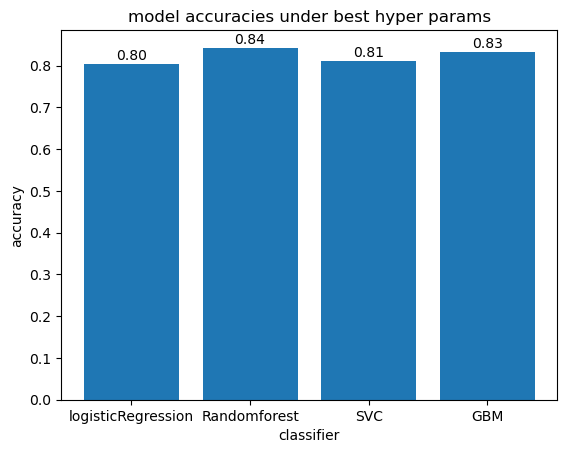

In [44]:
# Now comparing the classifiers accuracy
classifier_used=['logisticRegression','Randomforest','SVC','GBM']

accuracies=[lr_best_score, Rf_best_score, svc_best_score, gbm_best_score]
plt.bar(classifier_used,accuracies)
plt.xlabel('classifier')
plt.ylabel('accuracy')
plt.title('model accuracies under best hyper params')
plt.xticks(rotation=0)

for i, j in enumerate(accuracies):
    plt.text(i, j + 0.02, f"{j:.2f}", color='black', ha='center', va='center')

plt.show()

In [45]:
X_testing.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size
0,-1.727912,0.873482,0.755929,0.334993,-0.498407,-0.35149,-0.470915,-0.553443
1,-1.719625,0.873482,-1.322876,1.325530,-0.513274,-0.35149,0.700767,0.105643
2,-1.711337,-0.315819,0.755929,2.514175,-0.465088,-0.35149,-0.470915,-0.553443
3,-1.703050,0.873482,0.755929,-0.259330,-0.483466,-0.35149,0.700767,-0.553443
4,-1.694763,0.873482,-1.322876,-0.655545,-0.418471,-0.35149,0.700767,0.764728


As GBM model has proved to be providing high accuracy on tuning hyperparameters. So, we are going to pass our test_df through GBM model .

In [46]:
# Get the best model

best_gbm_model.fit(X_train,y_train)

#X-testing data is the encoded and scaled version of test_df given to us.
y_test_pred = best_gbm_model.predict(X_testing)

# To save the predictions
output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_test_pred})
output.to_csv('gender_submission.csv', index=False)
print("Submission file created: gender_submission.csv")



output

Submission file created: gender_submission.csv


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


As RandomForest model has proved to be providing high accuracy on tuning hyperparameters. So, we are going to pass our test_df through GBM model .

In [47]:
#get the best model

best_Rf_model.fit(X_train,y_train)

#X-testing data is the encoded and scaled version of test_df given to us.
y_test_pred = best_Rf_model.predict(X_testing)

# To save the predictions
output_Rf = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_test_pred})
output_Rf

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
